In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\numpy.pandas\Zomato_data.csv',encoding='unicode_escape') 

In [3]:
#lets remove the denominator of all rates i.e '/5'
def del_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(del_rate)

In [4]:
df['rate']=df['rate'].astype(int)

In [5]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4,775,800,Buffet
1,Spice Elephant,Yes,No,4,787,800,Buffet
2,San Churro Cafe,Yes,No,3,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3,88,300,Buffet
4,Grand Village,No,No,3,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3,0,100,Dining
144,New Indraprasta,No,No,3,0,150,Dining
145,Anna Kuteera,Yes,No,4,771,450,Dining
146,Darbar,No,No,3,98,800,Dining


In [6]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.162162,264.810811,418.243243
std,0.522345,653.676951,223.085098
min,2.000000,0.000000,100.000000
25%,3.000000,6.750000,200.000000
50%,3.000000,43.500000,400.000000
75%,3.000000,221.750000,600.000000
max,4.000000,4884.000000,950.000000


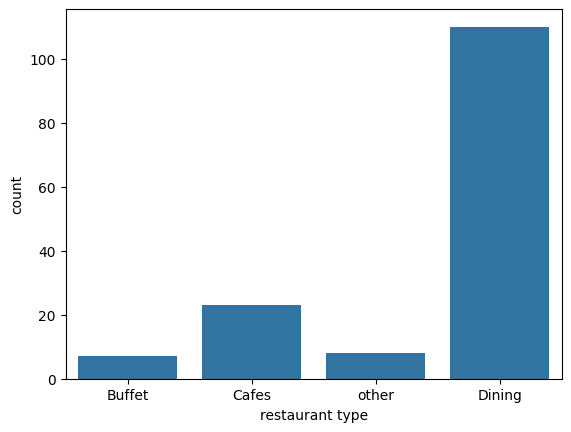

In [7]:
#Q.find which type of retaurants has highest number of customers.
#here, we are using a countplot.
sns.countplot(x='listed_in(type)',data=df)
plt.xlabel("restaurant type")
plt.show()

#conclusion : majority of the people order from dining type of restaurant. (dining>cafe>other>buffet)

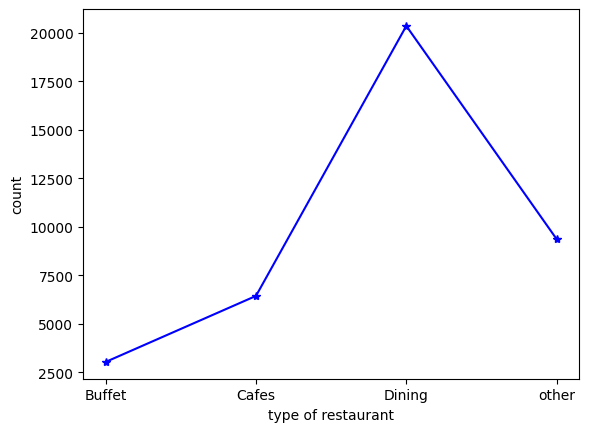

In [8]:
#Q.find which type of restaurant has the highest amount of votes.
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,color='b',marker='*')
plt.xlabel('type of restaurant')
plt.ylabel("count")
plt.show()
#conclusion: As we can see that, dining type of restaurant has the highest numbers of upvotes.

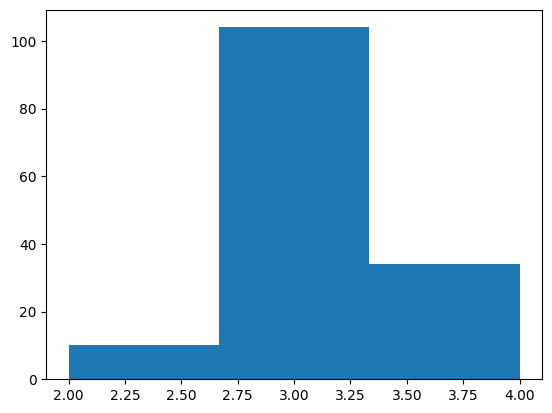

In [9]:
#Q.find majority of restaurant's ratings.
plt.hist(df['rate'],bins=3) 
plt.show()
# conclusion: majority of the restaurants are rated between 2-4.

In [10]:
df['rate'].unique() #this will return all the unique values in an array.

array([4, 3, 2])

In [11]:
df['rate'].nunique() #this will return how many number of values are there in a dataset.

3

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15356\397546278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='approx_cost(for two people)',data=df,palette='viridis')


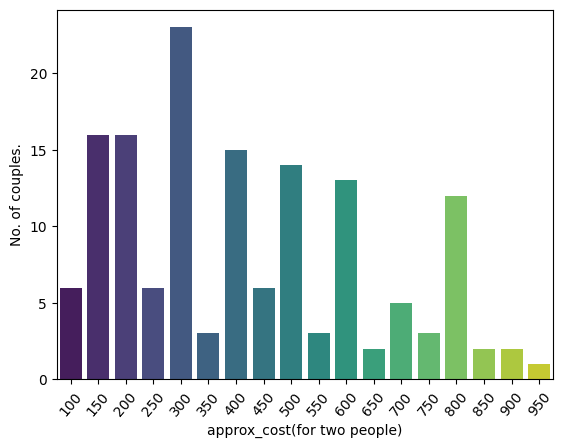

In [12]:
#Q.how much does a couple spends on an average basis?
sns.countplot(x='approx_cost(for two people)',data=df,palette='viridis')
plt.ylabel('No. of couples.')
plt.xticks(rotation=50) # for rotation.
plt.show()
#conclusion: An average couple spends about 300 rupees on a single order.
#with the help of this insight, the app will suggest foods which will range approx ~300

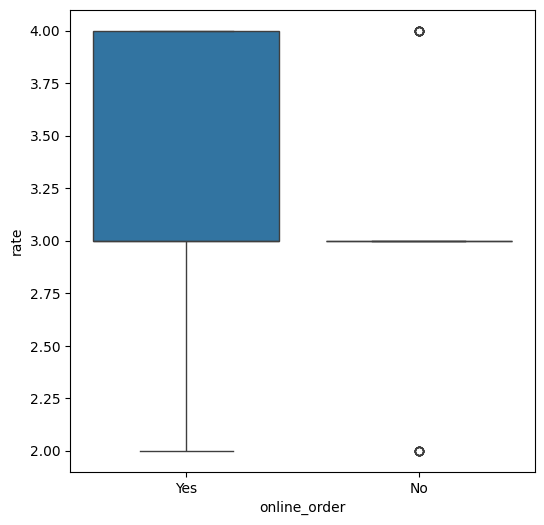

In [16]:
#Q.which rating is higher offline or online ?
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()
#conclusion : online order has better rating than that of offline orders.

In [18]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4,775,800,Buffet
1,Spice Elephant,Yes,No,4,787,800,Buffet
2,San Churro Cafe,Yes,No,3,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3,88,300,Buffet
4,Grand Village,No,No,3,166,600,Buffet


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

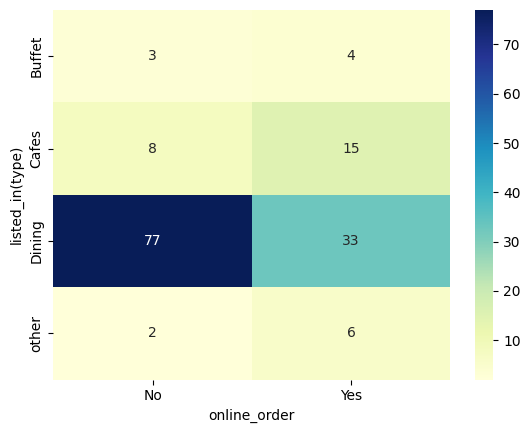

In [21]:
#Q.find which type of restaurant has highest amount of online and offline orders with their respective types.
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
#conclusion: As we can see that peolpe prefer to dine-in offline compared to all other options.

#Conclusion : offline dining has the majority(77) of the customers, whereas other offline restaurants has least(2) number of customers.